In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 150)

In [94]:
train_data = pd.read_csv('./data/train.csv', index_col='index')
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [95]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [96]:
train_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

In [97]:
train_data.loc[(train_data['familysize'] > 4), 'familysize'] = 5

In [98]:
train_data['familysize'].value_counts()

2    17918
3    11256
1     6535
4     4907
5     3699
0     1217
Name: familysize, dtype: int64

In [99]:
train_data['religion'].value_counts()

Atheist                 10192
Agnostic                 9624
Christian_Catholic       6431
Christian_Other          5137
Christian_Protestant     4875
Other                    4770
Hindu                    1429
Muslim                   1192
Buddhist                  850
Jewish                    487
Christian_Mormon          428
Sikh                      117
Name: religion, dtype: int64

In [100]:
def col_religion_by_check(data_):
    if data_ == 'Agnostic':
        return 'agnostic'
    elif data_ == 'Atheist':
        return 'atheist'
    elif data_ == 'Christian_Other':
        return 'christian_Other'
    elif data_ == 'Christian_Catholic':
        return 'christian_catholic'
    elif data_ == 'Christian_Protestant':
        return 'christian_protestant'
    else:
        return 'other'
    
train_data['prev_religion'] = train_data['religion'].apply(lambda x: col_religion_by_check(x))
train_data['prev_religion'].value_counts()

atheist                 10192
agnostic                 9624
other                    9273
christian_catholic       6431
christian_Other          5137
christian_protestant     4875
Name: prev_religion, dtype: int64

In [101]:
train_data = train_data.drop('religion', axis=1)

In [102]:
Q_A = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA',
       'QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [103]:
mqa = ['QaA','QdA','QeA','QfA','QgA','QiA','QkA','QnA','QqA','QrA']
pqa = ['QbA','QcA','QhA','QjA','QlA','QmA','QoA','QpA','QsA','QtA']
train_data[mqa] = train_data[mqa].apply(lambda x: 6-x)

In [104]:
train_data['Q_A_sum'] = train_data[Q_A].sum(axis=1)

In [105]:
wr_columns = ['wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']
wf_columns = ['wf_01', 'wf_02', 'wf_03']
train_data['wr_sum'] = train_data[wr_columns].sum(axis=1)
train_data['wr_mean'] = train_data[wr_columns].mean(axis=1)
train_data['wf_sum'] = train_data[wf_columns].sum(axis=1)
train_data['wf_mean'] = train_data[wf_columns].mean(axis=1)

In [106]:
tp_columns = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09', 'tp10']
train_data['tp_sum'] = train_data[tp_columns].sum(axis=1)
train_data['tp_mean'] = train_data[tp_columns].mean(axis=1)

In [107]:
train_data.loc[train_data['tp_sum'] > 50, 'tp_sum'] = train_data['tp_sum'].mean()

In [108]:
Q_E = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE',
       'QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']

In [109]:
train_data['Q_E_mean'] = train_data[Q_E].mean(axis=1)

In [110]:
train_data['Q_E_log'] = np.log(train_data['Q_E_mean'])

In [111]:
#train_data['Q_E_sum'] = train_data[Q_E].sum(axis=1)
train_data['Q_E_ratio'] = train_data[Q_E].sum(axis=1) / train_data['Q_A_sum']

In [112]:
# Q_E_threshold = [400, 800, 650, 700, 850, 500, 600, 1100, 1200, 800, 
#                  750, 750, 750, 400, 700, 700, 450, 900, 600, 800]
# def Q_E_Categorization(x, thr):
#     if x > thr:
#         return 1
#     else:
#         return 0

# for column, thr in zip(Q_E, Q_E_threshold):
#     train_data[column+'_cat'] = train_data[column].apply(lambda x: Q_E_Categorization(x, thr))

In [113]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,prev_religion,Q_A_sum,wr_sum,wr_mean,wf_sum,wf_mean,tp_sum,tp_mean,Q_E_mean,Q_E_log,Q_E_ratio
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,other,59.0,7,0.538462,0,0.000000,28.0,2.8,893.70,6.795370,302.949153
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,other,52.0,8,0.615385,0,0.000000,16.0,1.6,2478.25,7.815308,953.173077
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,other,38.0,10,0.769231,1,0.333333,30.0,3.0,1483.05,7.301856,780.552632
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,other,67.0,5,0.384615,0,0.000000,20.0,2.0,3635.70,8.198557,1085.283582
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,agnostic,60.0,11,0.846154,1,0.333333,25.0,2.5,924.35,6.829091,308.116667


In [114]:
category_en_column = ['age_group', 'education', 'familysize', 'married', 'urban', 'prev_religion', 'hand', 'race', 'engnat','gender']

In [115]:
train_data.reset_index(drop=True, inplace=True)

In [116]:
test_data.loc[(test_data['familysize'] > 4), 'familysize'] = 5

test_data['prev_religion'] = test_data['religion'].apply(lambda x: col_religion_by_check(x))
test_data = test_data.drop('religion', axis=1)

test_data[mqa] = test_data[mqa].apply(lambda x: 6-x)
test_data['Q_A_sum'] = test_data[Q_A].sum(axis=1)

test_data['wr_sum'] = test_data[wr_columns].sum(axis=1)
test_data['wr_mean'] = test_data[wr_columns].mean(axis=1)
test_data['wf_sum'] = test_data[wf_columns].sum(axis=1)
test_data['wf_mean'] = test_data[wf_columns].mean(axis=1)

test_data['tp_sum'] = test_data[tp_columns].sum(axis=1)
test_data['tp_mean'] = test_data[tp_columns].mean(axis=1)

test_data.loc[test_data['tp_sum'] > 50, 'tp_sum'] = test_data['tp_sum'].mean()

test_data['Q_E_mean'] = test_data[Q_E].mean(axis=1)
test_data['Q_E_log'] = np.log(test_data['Q_E_mean'])

#test_data['Q_E_sum'] = test_data[Q_E].sum(axis=1)
test_data['Q_E_ratio'] = test_data[Q_E].sum(axis=1) / test_data['Q_A_sum']

# for column, thr in zip(Q_E, Q_E_threshold):
#     test_data[column+'_cat'] = test_data[column].apply(lambda x: Q_E_Categorization(x, thr))

In [117]:
# from sklearn.preprocessing import OneHotEncoder

# for column in category_en_column:
#     encoder = OneHotEncoder(categories = 'auto', sparse=False)
#     encoder.fit(np.array(train_data[column]).reshape(-1, 1))
#     inf_dummies = encoder.transform(np.array(train_data[column]).reshape(-1, 1))
#     dummies = pd.DataFrame(inf_dummies.astype(int), columns = [column + str(x) for x in encoder.categories_[0]])
#     train_data = pd.concat([train_data, dummies], axis=1)

#     inf_dummies = encoder.transform(np.array(test_data[column]).reshape(-1, 1))
#     dummies = pd.DataFrame(inf_dummies.astype(int), columns = [column + str(x) for x in encoder.categories_[0]])
#     test_data = pd.concat([test_data, dummies], axis=1)


In [118]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
for column in category_en_column:
    train_data['label_'+column] = label_en.fit_transform(train_data[column])
    test_data['label_'+column] = label_en.transform(test_data[column])

In [119]:
train_data.shape, test_data.shape

((45532, 97), (11383, 96))

In [120]:
train_data = train_data.drop(category_en_column, axis=1)
test_data = test_data.drop(category_en_column, axis=1)
train_data.shape, test_data.shape

((45532, 87), (11383, 86))

In [121]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Q_A_sum,wr_sum,wr_mean,wf_sum,wf_mean,tp_sum,tp_mean,Q_E_mean,Q_E_log,Q_E_ratio,label_age_group,label_education,label_familysize,label_married,label_urban,label_prev_religion,label_hand,label_race,label_engnat,label_gender
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,1.0,539,4.0,586,4.0,1095,1.0,1142,4.0,1287,2.0,883,4.0,851,2.0,851,1.0,816,2.0,579,2.0,924,4.0,366,4.0,876,2.0,633,1.0,1115,2,2,2,1,2,1,7,4,4,3,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,59.0,7,0.538462,0,0.000000,28.0,2.8,893.70,6.795370,302.949153,3,2,4,3,1,5,1,6,1,0
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,3.0,2190,5.0,826,1.0,4082,1.0,1867,3.0,1264,1.0,2943,4.0,3927,1.0,4329,1.0,1828,1.0,1214,5.0,2414,1.0,1356,5.0,3039,4.0,4304,1.0,1346,1,1,0,0,1,2,3,4,0,4,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,52.0,8,0.615385,0,0.000000,16.0,1.6,2478.25,7.815308,953.173077,2,4,3,1,3,5,1,1,2,0
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,5.0,531,2.0,1167,1.0,1016,3.0,2653,2.0,1569,1.0,998,5.0,2547,2.0,918,2.0,2153,2.0,1304,1.0,1131,1.0,937,2.0,1327,1.0,1170,1.0,1409,2,3,1,5,3,4,2,6,1,3,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,38.0,10,0.769231,1,0.333333,30.0,3.0,1483.05,7.301856,780.552632,3,3,3,2,2,5,1,6,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,4.0,1519,2.0,159,3.0,2275,1.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,2.0,1216,4.0,1169,4.0,23868,3.0,581,2.0,8830,4.0,2392,5.0,1312,2,4,1,1,1,3,1,3,1,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,67.0,5,0.384615,0,0.000000,20.0,2.0,3635.70,8.198557,1085.283582,2,4,0,1,3,5,1,1,2,0
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,4.0,628,5.0,991,1.0,1259,1.0,1153,5.0,1388,1.0,740,5.0,1181,4.0,547,4.0,575,1.0,754,4.0,1140,1.0,323,1.0,1070,1.0,583,2.0,1889,1,1,1,6,0,2,0,6,2,6,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,60.0,11,0.846154,1,0.333333,25.0,2.5,924.35,6.829091,308.116667,2,3,2,2,1,0,1,6,1,1


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
train_all_data = train_data.drop('voted', axis=1)
train_target = train_data['voted']

In [124]:
X_train, X_valid, y_train, y_valid = train_test_split(train_all_data, train_target, test_size=0.2)

In [125]:
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

In [126]:
bayesian_params = {
    'max_depth': (6, 16), 
    'num_leaves': (24, 64), 
    'min_child_samples': (10, 200), 
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha': (0.01, 50) 
}

In [127]:
def lgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample, 
                colsample_bytree,max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":500, "learning_rate":0.02,
        'max_depth': int(round(max_depth)),
        'num_leaves': int(round(num_leaves)), 
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample': max(min(subsample, 1), 0), 
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_bin':  max(int(round(max_bin)),10),
        'reg_lambda': max(reg_lambda,0),
        'reg_alpha': max(reg_alpha, 0)
    }
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric= 'auc', verbose= 100, 
                early_stopping_rounds= 100)
    valid_proba = lgb_model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, valid_proba)
    
    return roc_auc 

In [128]:
lgbBO = BayesianOptimization(lgb_roc_eval,bayesian_params , random_state=0)
lgbBO.maximize(init_points=5, n_iter=45)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.778279	training's binary_logloss: 0.564651	valid_1's auc: 0.764301	valid_1's binary_logloss: 0.570479
[200]	training's auc: 0.793108	training's binary_logloss: 0.543766	valid_1's auc: 0.766237	valid_1's binary_logloss: 0.559373
[300]	training's auc: 0.80614	training's binary_logloss: 0.532392	valid_1's auc: 0.766906	valid_1's binary_logloss: 0.557812
[400]	training's auc: 0.817939	training's binary_logloss: 0.52243	valid_1's auc: 0.766736	valid_1's binary_logloss: 0.557849
Early stopping, best iteration is:
[330]	training's auc: 0.809943	training's binary_logloss: 0.529208	valid_1's auc: 0.767042	valid_1's binary_logloss: 0.557708
|  1   

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.789995	training's binary_logloss: 0.560875	valid_1's auc: 0.765233	valid_1's binary_logloss: 0.572647
[200]	training's auc: 0.809844	training's binary_logloss: 0.532562	valid_1's auc: 0.767813	valid_1's binary_logloss: 0.558453
[300]	training's auc: 0.82742	training's binary_logloss: 0.515829	valid_1's auc: 0.76782	valid_1's binary_logloss: 0.556736
Early stopping, best iteration is:
[222]	training's auc: 0.813943	training's binary_logloss: 0.528536	valid_1's auc: 0.768215	valid_1's binary_logloss: 0.557578
|  10       |  0.7682   |  0.555    |  413.0    |  8.685    |  111.2    |  2.34     |  57.53    |  7.585    |  8.501    |  0.5087   |
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.776963	training's binary_logloss: 0.569356	valid_1's auc: 0.764655	valid_1's binary_logloss: 0.574634
[200]	training's auc: 0.788506	training's binary_logloss: 0.548063	valid_1's au

[300]	training's auc: 0.797316	training's binary_logloss: 0.537513	valid_1's auc: 0.768358	valid_1's binary_logloss: 0.556424
[400]	training's auc: 0.806196	training's binary_logloss: 0.530159	valid_1's auc: 0.768554	valid_1's binary_logloss: 0.556083
Early stopping, best iteration is:
[372]	training's auc: 0.803819	training's binary_logloss: 0.532113	valid_1's auc: 0.76865	valid_1's binary_logloss: 0.556058
|  19       |  0.7687   |  0.8519   |  11.33    |  13.97    |  171.5    |  39.3     |  24.89    |  5.283    |  6.049    |  0.8737   |
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.767278	training's binary_logloss: 0.574257	valid_1's auc: 0.762759	valid_1's binary_logloss: 0.575562
[200]	training's auc: 0.775396	training's binary_logloss: 0.556842	valid_1's auc: 0.765217	valid_1's binary_logloss: 0.561745
[300]	training's auc: 0.78186	training's binary_logloss: 0.550122	valid_1's auc: 0.765977	valid_1's binary_logloss: 0.559378
[400]	training'

[200]	training's auc: 0.776183	training's binary_logloss: 0.555807	valid_1's auc: 0.765067	valid_1's binary_logloss: 0.561279
[300]	training's auc: 0.781946	training's binary_logloss: 0.549778	valid_1's auc: 0.765556	valid_1's binary_logloss: 0.559267
[400]	training's auc: 0.786959	training's binary_logloss: 0.545478	valid_1's auc: 0.766043	valid_1's binary_logloss: 0.558675
[500]	training's auc: 0.791561	training's binary_logloss: 0.541673	valid_1's auc: 0.765972	valid_1's binary_logloss: 0.558619
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.791561	training's binary_logloss: 0.541673	valid_1's auc: 0.765972	valid_1's binary_logloss: 0.558619
|  28       |  0.766    |  0.6897   |  27.67    |  11.02    |  104.9    |  35.51    |  24.1     |  34.51    |  9.274    |  0.6568   |
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.783103	training's binary_logloss: 0.562052	valid_1's auc: 0.766878	valid_1's binary_logloss: 0.569445


Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.783903	training's binary_logloss: 0.558206	valid_1's auc: 0.765367	valid_1's binary_logloss: 0.566518
[200]	training's auc: 0.800836	training's binary_logloss: 0.537721	valid_1's auc: 0.767075	valid_1's binary_logloss: 0.557844
[300]	training's auc: 0.815515	training's binary_logloss: 0.524913	valid_1's auc: 0.767087	valid_1's binary_logloss: 0.55726
Early stopping, best iteration is:
[213]	training's auc: 0.802744	training's binary_logloss: 0.535933	valid_1's auc: 0.7672	valid_1's binary_logloss: 0.557624
|  37       |  0.7672   |  0.9396   |  400.3    |  10.37    |  119.1    |  41.76    |  37.21    |  8.239    |  1.463    |  0.8527   |
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.795062	training's binary_logloss: 0.558135	valid_1's auc: 0.765803	valid_1's binary_logloss: 0.572364
[200]	training's auc: 0.816714	training's binary_logloss: 0.528292	valid_1's auc

[300]	training's auc: 0.809184	training's binary_logloss: 0.527842	valid_1's auc: 0.767839	valid_1's binary_logloss: 0.556129
[400]	training's auc: 0.820587	training's binary_logloss: 0.518022	valid_1's auc: 0.768408	valid_1's binary_logloss: 0.555712
Early stopping, best iteration is:
[378]	training's auc: 0.818003	training's binary_logloss: 0.520203	valid_1's auc: 0.768488	valid_1's binary_logloss: 0.555671
|  46       |  0.7685   |  0.9357   |  15.73    |  6.498    |  58.07    |  4.897    |  41.49    |  3.041    |  6.99     |  0.7052   |
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.784425	training's binary_logloss: 0.561157	valid_1's auc: 0.765546	valid_1's binary_logloss: 0.569982
[200]	training's auc: 0.800852	training's binary_logloss: 0.537772	valid_1's auc: 0.769136	valid_1's binary_logloss: 0.557019
[300]	training's auc: 0.815657	training's binary_logloss: 0.524274	valid_1's auc: 0.769296	valid_1's binary_logloss: 0.555528
Early stoppin

In [129]:
lgbBO.max

{'target': 0.7704058093993701,
 'params': {'colsample_bytree': 0.5,
  'max_bin': 10.0,
  'max_depth': 9.955010880230024,
  'min_child_samples': 86.42861521302478,
  'min_child_weight': 33.834537145374206,
  'num_leaves': 57.12442021843676,
  'reg_alpha': 0.01,
  'reg_lambda': 0.001,
  'subsample': 0.681002321490025}}

In [130]:
lgb_model = LGBMClassifier(
                nthread=4,
                n_estimators=10000,
                learning_rate=0.02,
                max_depth = 10,
                num_leaves= 57,
                colsample_bytree=0.5,
                subsample=0.681,
                max_bin=10,
                reg_alpha=0.01,
                reg_lambda=0.001,
                min_child_weight=34,
                min_child_samples=86,
                silent=-1,
                verbose=-1,
                )

In [131]:
lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
             eval_metric='auc', verbose=100, early_stopping_rounds=100)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.79939	training's binary_logloss: 0.554877	valid_1's auc: 0.767414	valid_1's binary_logloss: 0.570956
[200]	training's auc: 0.819469	training's binary_logloss: 0.524713	valid_1's auc: 0.769484	valid_1's binary_logloss: 0.557113
[300]	training's auc: 0.837873	training's binary_logloss: 0.506293	valid_1's auc: 0.770393	valid_1's binary_logloss: 0.554635
Early stopping, best iteration is:
[293]	training's auc: 0.836705	training's binary_logloss: 0.507429	valid_1's auc: 0.770406	valid_1's binary_logloss: 0.554639


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.02, max_bin=10,
               max_depth=10, min_child_samples=86, min_child_weight=34,
               min_split_gain=0.0, n_estimators=10000, n_jobs=-1, nthread=4,
               num_leaves=57, objective=None, random_state=None, reg_alpha=0.01,
               reg_lambda=0.001, silent=-1, subsample=0.681,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

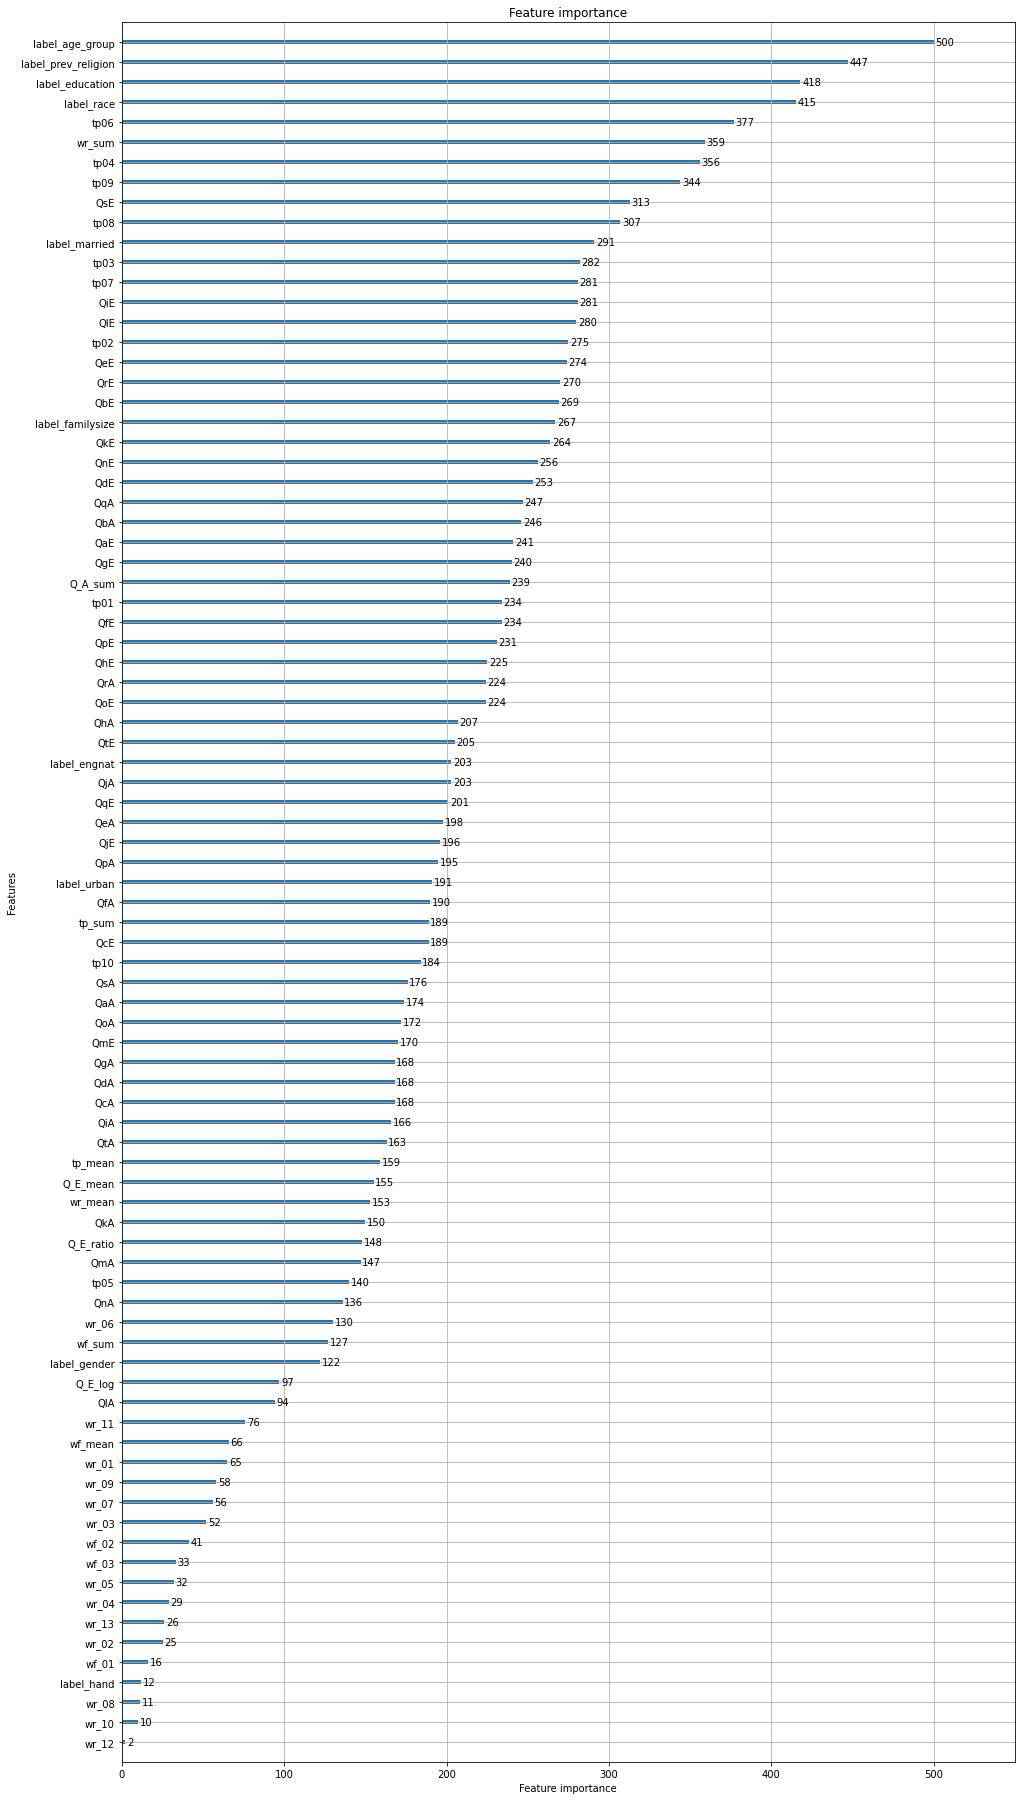

In [132]:
from lightgbm import plot_importance
plot_importance(lgb_model, figsize=(16,32))

In [133]:
preds = lgb_model.predict(test_data)

In [134]:
sub_data = pd.DataFrame()

In [135]:
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [136]:
sub_data['index'] = test_data.index
sub_data['voted'] = preds

In [137]:
sub_data.head()

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2


In [138]:
sub_data.to_csv('./feature_engineering07.csv', index=False)

# Score: 0.7016